In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
city_hall_df = pd.read_csv('city_hall.csv')
city_hall_df.head()
city_hall_df.info()
city_hall_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106766 entries, 0 to 106765
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateTime_Measured  106766 non-null  object
 1   Total_Demand_KW    106766 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


,DateTime_Measured,Total_Demand_KW
106761,2016-10-27 10:30:00,1739
106762,2016-10-27 10:15:00,1724
106763,2016-10-27 10:00:00,1731
106764,2016-10-27 09:45:00,1724
106765,2016-10-27 09:30:00,1716


In [8]:
weather_df = pd.read_csv('boston_weather_data.csv')
weather_df.head()
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    3653 non-null   object 
 1   tavg    3652 non-null   float64
 2   tmin    3653 non-null   float64
 3   tmax    3653 non-null   float64
 4   prcp    3653 non-null   float64
 5   wdir    3066 non-null   float64
 6   wspd    3653 non-null   float64
 7   pres    3492 non-null   float64
dtypes: float64(7), object(1)
memory usage: 228.4+ KB


In [10]:
extreme_weather_df = pd.read_csv('storm_data_search_results.csv')
extreme_weather_df['CZ_NAME_STR'].unique()

array(['SUFFOLK (ZONE)', 'SUFFOLK CO.'], dtype=object)

## Extreme weather df looks pretty gross so going to focus on the first two to start out and investigate the drop off with the city hall df... might need some other df for consumption

In [20]:
city_hall_df.head()
len(city_hall_df)
city_hall_df.columns.tolist()
type(city_hall_df.loc[1, 'DateTime_Measured'])
# all of these dates are strings so fuck that
type(weather_df.loc[1, 'time'])

str

In [37]:
city_hall_df['date'] = pd.to_datetime(city_hall_df['DateTime_Measured'].str[:10])
city_hall_aggregated = city_hall_df.groupby('date')['Total_Demand_KW'].sum().reset_index()
weather_df['date'] = pd.to_datetime(weather_df['time'])
city_hall_range = city_hall_df['date'].agg(['min', 'max'])
weather_df_trimmed = weather_df[(weather_df['date'] >= city_hall_range['min']) & (weather_df['date'] <= city_hall_range['max'])]

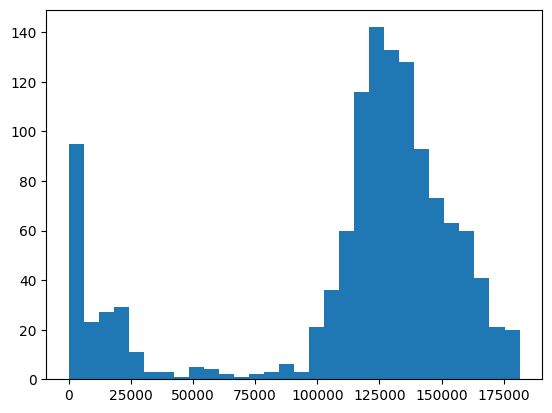

In [41]:
city_hall_weather_df = city_hall_aggregated.merge(weather_df_trimmed, on = 'date', how = 'inner')
plt.hist(city_hall_weather_df['Total_Demand_KW'], bins = 30);
# not loving that distribution of demand... going to investigate where things drop off

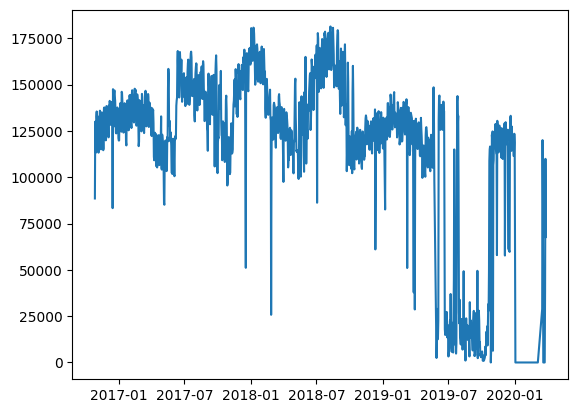

In [43]:
plt.plot(city_hall_weather_df['date'], city_hall_weather_df['Total_Demand_KW']);
# that drop off is a problem...

## Public library dataset looks promising

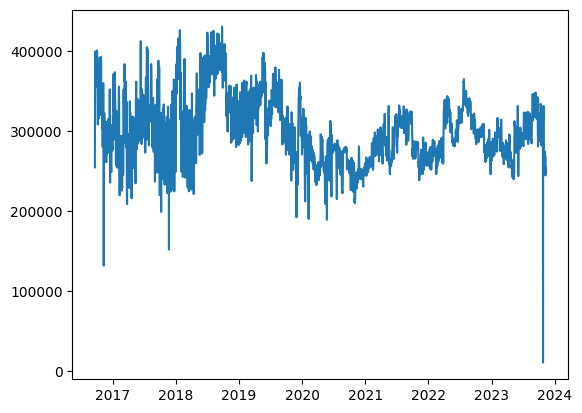

In [54]:
bpl_df = pd.read_csv('BPL.csv')
bpl_df['usage_datetime_start_eastern_time'].agg(['min', 'max'])
bpl_df.head()
bpl_df['date'] = pd.to_datetime(bpl_df['usage_datetime_start_eastern_time'].str[:10])
bpl_df.head()
bpl_df_agg = bpl_df.groupby('date')['usage_kw'].sum().reset_index()
bpl_df_agg.head(20)
plt.plot(bpl_df_agg['date'], bpl_df_agg['usage_kw']);